# Output Implementation

We introduce an output class to store the system stats. 

The implementations for each output class will feature various plotting 
methods, which will need to be specific to each model. 

As an example, we have the Lorenz model below. Note that when the model 
runs, the states are saved to the `output.states` class attribute. 

Then, the `output` instance can run methods like `plot_states()` to display 
the change in state over time. 

More plotting methods can be introduced when we have a better idea of what we 
want. For example, in the SIR compartment models, we may want to store and 
display the time-variant parameters. 

We plan on implementing a RUME (runnable modeling experiment) class next, 
which will encapsulate most of the code below into one object. So, the exact
 way that methods are called may change. 
 
### Note on Output Methods
The Output abstract class currently has a `store()` method that appends a 
single state at time `t` to the object's `state` attribute. This might be 
used when the RUME object is implemented, or it could be removed if it 
serves no purpose.   


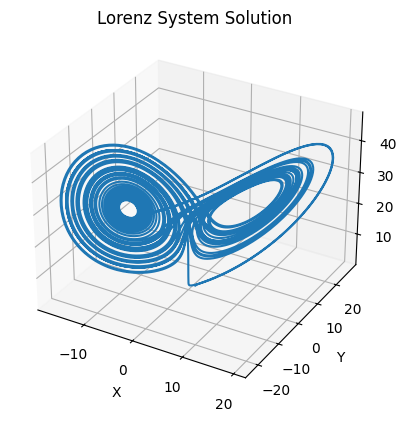

[  1.          1.0031939   1.0125686 ... -10.008008  -10.04525
 -10.077825 ]


In [1]:
import sys

sys.path.append("../")

from sphere.model.implementations.Lorenz import LorenzModel
from sphere.model.abstract.parameters import LorenzParameters
from sphere.model.abstract.solvers import JAXSolver
from sphere.output.implementations import LorenzOutput

# Initialize Model Parameters
lorenz_params = LorenzParameters(
    initial_state=(1.0, 1.0, 1.0), sigma=10.0, rho=28.0, beta=8.0 / 3.0
)

solver = JAXSolver()  # Choose a solver
model = LorenzModel(lorenz_params, solver)  # Initialize the model
output = LorenzOutput()  # Initialize an output object
output.states = model.run(time_steps=50)  # Run the model

output.plot_states()
print(output.states[0])

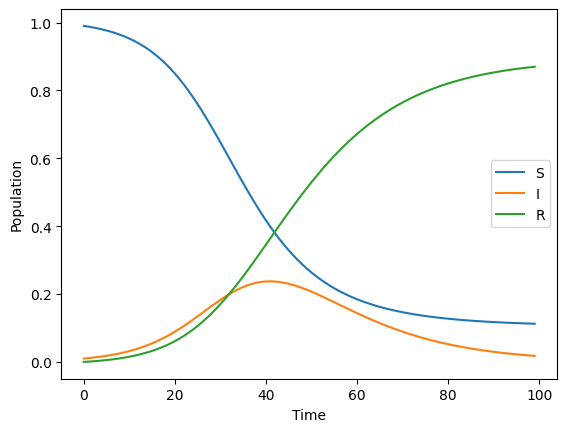

In [3]:
import sys

sys.path.append("../")

from sphere.model.implementations.SIR import SIRModel
from sphere.model.abstract.parameters import SIRParameters
from sphere.model.abstract.solvers import JAXSolver
from sphere.output.implementations import SIROutput

sir_params = SIRParameters(initial_state=(0.99, 0.01, 0.0), beta=0.2, gamma=0.08)

solver = JAXSolver()
model = SIRModel(sir_params, solver)
output = SIROutput()
output.states = model.run(time_steps=100)

output.plot_states()